<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Collecting Job Data Using APIs**


Estimated time needed: **30** minutes


## Objectives


After completing this lab, you will be able to:


*   Collect job data using Jobs API
*   Store the collected data into an excel spreadsheet.


><strong>Note: Before starting with the assignment make sure to read all the instructions and then move ahead with the coding part.</strong>


#### Instructions


To run the actual lab, firstly you need to click on the [Jobs_API](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Jobs_API.ipynb) notebook link. The file contains flask code which is required to run the Jobs API data.

Now, to run the code in the file that opens up follow the below steps.

Step1: Download the file. 

Step2: Upload the file into your current Jupyter environment using the upload button in your Jupyter interface. Ensure that the file is in the same folder as your working .ipynb file.

Step 2: If working in a local Jupyter environment, use the "Upload" button in your Jupyter interface to upload the Jobs_API notebook into the same folder as your current .ipynb file.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Upload.PNG">

Step3:  Open the Jobs_API notebook, and run all the cells to start the Flask application. Once the server is running, you can access the API from the URL provided in the notebook.

If you want to learn more about flask, which is optional, you can click on this link [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/FLASK_API.md.html).

Once you run the flask code, you can start with your assignment.


## Dataset Used in this Assignment

The dataset used in this lab comes from the following source: https://www.kaggle.com/promptcloud/jobs-on-naukricom under the under a **Public Domain license**.

> Note: We are using a modified subset of that dataset for the lab, so to follow the lab instructions successfully please use the dataset provided with the lab, rather than the dataset from the original source.

The original dataset is a csv. We have converted the csv to json as per the requirement of the lab.


## Warm-Up Exercise


Before you attempt the actual lab, here is a fully solved warmup exercise that will help you to learn how to access an API.


Using an API, let us find out who currently are on the International Space Station (ISS).<br> The API at [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) gives us the information of astronauts currently on ISS in json format.<br>
You can read more about this API at [http://open-notify.org/Open-Notify-API/People-In-Space/](http://open-notify.org/Open-Notify-API/People-In-Space?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


In [1]:
import requests # you need this module to make an API call
import pandas as pd

In [2]:
api_url = "http://api.open-notify.org/astros.json" # this url gives use the astronaut data

In [3]:
response = requests.get(api_url) # Call the API using the get method and store the
                                # output of the API call in a variable called response.

In [4]:
if response.ok:             # if all is well() no errors, no network timeouts)
    data = response.json()  # store the result in json format in a variable called data
                            # the variable data is of type dictionary.

In [5]:
print(data)   # print the data just to check the output or for debugging

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Li Guangsu'}, {'craft': 'Tiangong', 'name': 'Li Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


Print the number of astronauts currently on ISS.


In [6]:
print(data.get('number'))

12


Print the names of the astronauts currently on ISS.


In [7]:
astronauts = data.get('people')
print("There are {} astronauts on ISS".format(len(astronauts)))
print("And their names are :")
for astronaut in astronauts:
    print(astronaut.get('name'))

There are 12 astronauts on ISS
And their names are :
Oleg Kononenko
Nikolai Chub
Tracy Caldwell Dyson
Matthew Dominick
Michael Barratt
Jeanette Epps
Alexander Grebenkin
Butch Wilmore
Sunita Williams
Li Guangsu
Li Cong
Ye Guangfu


Hope the warmup was helpful. Good luck with your next lab!


## Lab: Collect Jobs Data using Jobs API


### Objective: Determine the number of jobs currently open for various technologies  and for various locations


Collect the number of job postings for the following locations using the API:

* Los Angeles
* New York
* San Francisco
* Washington DC
* Seattle
* Austin
* Detroit


In [8]:
#Import required libraries
import pandas as pd
import json


#### Write a function to get the number of jobs for the Python technology.<br>
> Note: While using the lab you need to pass the **payload** information for the **params** attribute in the form of **key** **value** pairs.
  Refer the ungraded **rest api lab** in the course **Python for Data Science, AI & Development**  <a href="https://www.coursera.org/learn/python-for-applied-data-science-ai/ungradedLti/P6sW8/hands-on-lab-access-rest-apis-request-http?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01">link</a>
  
 ##### The keys in the json are 
 * Job Title
 
 * Job Experience Required
 
 * Key Skills
 
 * Role Category
 
 * Location
 
 * Functional Area
 
 * Industry
 
 * Role 
 
You can also view  the json file contents  from the following <a href = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json">json</a> URL.



In [9]:
api_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
def get_number_of_jobs_T(technology):
    
    #your code goes here
        # Set up the payload with the technology as a key
    params = {"Key Skills": technology}
    
    # Make the API request
    response = requests.get(api_url, params=params)
    
    # Parse the response
    if response.status_code == 200:
        data = response.json()
        # Count the number of jobs based on the response
        number_of_jobs = len(data)
    else:
        number_of_jobs = 0
    return technology,number_of_jobs

Calling the function for Python and checking if it works.


In [17]:
get_number_of_jobs_T("Python")

('Python', 27005)

In [22]:
import requests

# API URL
api_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"

# Fetching the data from the API
response = requests.get(api_url)

# Check if the response status is OK
if response.status_code == 200:
    data = response.text  # Using `.text` to view the raw string if it's not parsed yet
    print(type(data))  # Check the type of the data
    print(data[:500])  # Print the first 500 characters of the raw data to check the format
else:
    print("Failed to retrieve data.")
    
    import json

# If data is a string, try parsing it as JSON
if isinstance(data, str):
    data = json.loads(data)  # Parse the string into a Python object
    print(type(data))  # Verify the structure after parsing
    print(data[:2])  # Check the first two elements to see if it's a list of dictionaries

<class 'str'>
[
 {
   "Id": 0,
   "Job Title": "Digital Media Planner",
   "Job Experience Required": "5 - 10 yrs",
   "Key Skills": "Media Planning| Digital Media",
   "Role Category": "Advertising",
   "Location": "Los Angeles",
   "Functional Area": "Marketing , Advertising , MR , PR , Media Planning",
   "Industry": "Advertising, PR, MR, Event Management",
   "Role": "Media Planning Executive/Manager"
 },
 {
   "Id": 1,
   "Job Title": "Online Bidding Executive",
   "Job Experience Required": "2 - 5 yrs",
<class 'list'>
[{'Id': 0, 'Job Title': 'Digital Media Planner', 'Job Experience Required': '5 - 10 yrs', 'Key Skills': 'Media Planning| Digital Media', 'Role Category': 'Advertising', 'Location': 'Los Angeles', 'Functional Area': 'Marketing , Advertising , MR , PR , Media Planning', 'Industry': 'Advertising, PR, MR, Event Management', 'Role': 'Media Planning Executive/Manager'}, {'Id': 1, 'Job Title': 'Online Bidding Executive', 'Job Experience Required': '2 - 5 yrs', 'Key Skills'

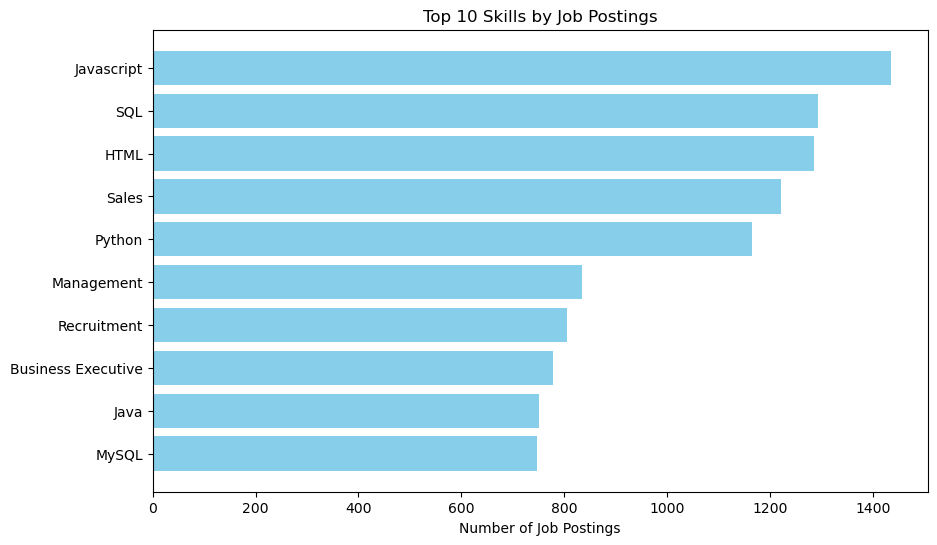

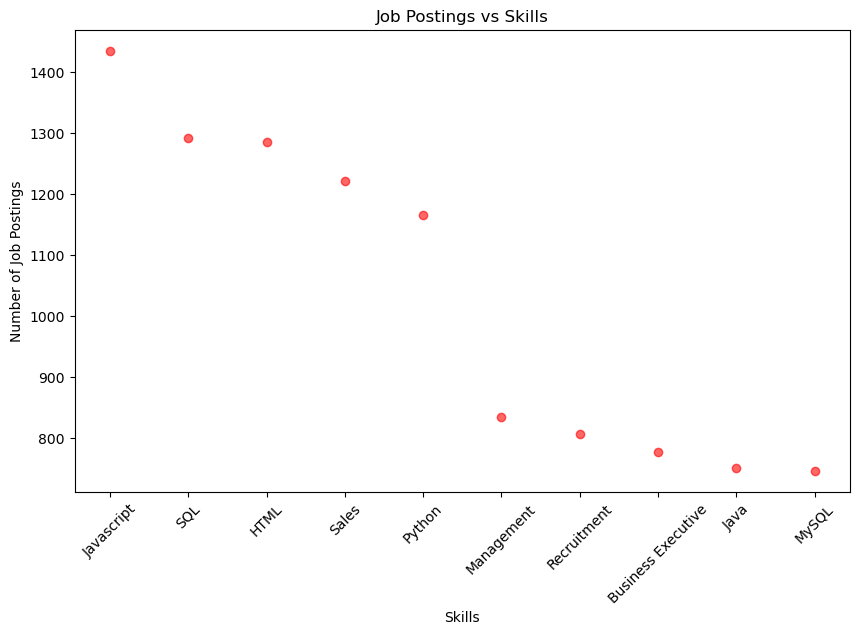

In [23]:
import requests
import json
import matplotlib.pyplot as plt

# API URL
api_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"

# Fetching the data from the API
response = requests.get(api_url)

# Check if the response status is OK
if response.status_code == 200:
    # Parse the string into a Python object (list of dictionaries)
    data = json.loads(response.text)

    # Initialize a dictionary to count the skills
    skills_counts = {}
    
    # Loop through each job posting and process the key skills
    for job in data:
        # Get the key skills and split them into individual skills
        skills = job.get("Key Skills", "")
        skills_list = skills.split('|')  # Split by pipe character
        
        for skill in skills_list:
            # Strip any leading/trailing spaces
            skill = skill.strip()
            if skill not in skills_counts:
                skills_counts[skill] = 0
            skills_counts[skill] += 1
    
    # Sorting the skills by the number of job postings (in descending order)
    sorted_skills = sorted(skills_counts.items(), key=lambda x: x[1], reverse=True)

    # Top 10 skills for the bar chart
    top_skills = sorted_skills[:10]
    skills, counts = zip(*top_skills)

    # Bar chart for top 10 skills by job postings
    plt.figure(figsize=(10, 6))
    plt.barh(skills, counts, color='skyblue')
    plt.xlabel('Number of Job Postings')
    plt.title('Top 10 Skills by Job Postings')
    plt.gca().invert_yaxis()  # To display the highest count on top
    plt.show()

    # Scatter plot showing relationship between job postings and skills
    plt.figure(figsize=(10, 6))
    plt.scatter(skills, counts, color='red', alpha=0.6)
    plt.xlabel('Skills')
    plt.ylabel('Number of Job Postings')
    plt.title('Job Postings vs Skills')
    plt.xticks(rotation=45)
    plt.show()

else:
    print("Failed to retrieve data.")

#### Write a function to find number of jobs in US for a location of your choice


In [13]:
import requests
def get_number_of_jobs_L(location):
    
    #your coe goes here
    # Set up the payload with the location as a key
    params = {"Location": location}
    
    # Make the API request
    response = requests.get(api_url, params=params)
    
    # Parse the response
    if response.status_code == 200:
        data = response.json()
        # Count the number of jobs based on the response
        number_of_jobs = len(data)
    else:
        number_of_jobs = 0
    return location,number_of_jobs

Call the function for Los Angeles and check if it is working.


In [24]:
#your code goes here
# Test for technology
print(get_number_of_jobs_T("Python"))

# Test for location
print(get_number_of_jobs_L("Los Angeles"))

('Python', 27005)
('Los Angeles', 27005)


### Store the results in an excel file


Call the API for all the given technologies above and write the results in an excel spreadsheet.


If you do not know how create excel file using python, double click here for **hints**.

<!--

from openpyxl import Workbook        # import Workbook class from module openpyxl
wb=Workbook()                        # create a workbook object
ws=wb.active                         # use the active worksheet
ws.append(['Country','Continent'])   # add a row with two columns 'Country' and 'Continent'
ws.append(['Eygpt','Africa'])        # add a row with two columns 'Egypt' and 'Africa'
ws.append(['India','Asia'])          # add another row
ws.append(['France','Europe'])       # add another row
wb.save("countries.xlsx")            # save the workbook into a file called countries.xlsx


-->


Create a python list of all technologies for which you need to find the number of jobs postings.


In [25]:
#your code goes here
technologies = [
    "C", "C#", "C++", "Java", "JavaScript", 
    "Python", "Scala", "Oracle", 
    "SQL Server", "MySQL Server", "PostgreSQL", "MongoDB"
]

Import libraries required to create excel spreadsheet


In [35]:
# your code goes here
!pip install openpyxl
import requests
import pandas as pd
from openpyxl import Workbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 kB 34.1 MB/s eta 0:00:00


Create a workbook and select the active worksheet


In [36]:
# your code goes here
# Create a workbook
wb = Workbook()

# Select the active worksheet
ws = wb.active

# Rename the active worksheet
ws.title = "Job Postings"

# Add headers to the worksheet
ws.append(["Technology", "Number of Jobs"])

Find the number of jobs postings for each of the technology in the above list.
Write the technology name and the number of jobs postings into the excel spreadsheet.


In [37]:
#your code goes here
# Fetch job postings for each technology
for tech in technologies:
    tech, job_count = get_number_of_jobs_T(tech)
    ws.append([tech, job_count])

Save into an excel spreadsheet named **job-postings.xlsx**.


In [38]:
#your code goes here
wb.save("job-postings.xlsx")
print("Job postings data saved to job-postings.xlsx")

Job postings data saved to job-postings.xlsx


#### In the similar way, you can try for below given technologies and results  can be stored in an excel sheet.


Collect the number of job postings for the following languages using the API:

*   C
*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL Server
*   PostgreSQL
*   MongoDB


In [39]:
# your code goes here
api_url = "https://jobs.github.com/positions.json"
languages = [
    "C", "C#", "C++", "Java", "JavaScript", 
    "Python", "Scala", "Oracle", 
    "SQL Server", "MySQL Server", "PostgreSQL", "MongoDB"
]
def get_job_count(language):
    params = {'description': language}
    response = requests.get(api_url, params=params)
    if response.status_code == 200:
        jobs = response.json()
        return len(jobs)
    else:
        print(f"Failed to fetch data for {language}")
        return 0
    job_data = []

for lang in languages:
    count = get_job_count(lang)
    job_data.append({'Language': lang, 'Job Postings': count})
    
    # Create a DataFrame
df = pd.DataFrame(job_data)

# Create an Excel writer object and write the DataFrame to Excel
with pd.ExcelWriter('job_postings.xlsx', engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Job Postings')

print("Data has been written to job_postings.xlsx")

ConnectionError: HTTPSConnectionPool(host='jobs.github.com', port=443): Max retries exceeded with url: /positions.json?description=C (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fe1cfc32d50>: Failed to establish a new connection: [Errno 111] Connection refused'))

## Authors


Ayushi Jain


### Other Contributors


Rav Ahuja

Lakshmi Holla

Malika


Copyright © IBM Corporation.


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- | 
| 2022-01-19        | 0.3     | Lakshmi Holla        | Added changes in the markdown      |
| 2021-06-25        | 0.2     | Malika            | Updated GitHub job json link       |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
